In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
# Step 1. Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [8]:
# Step 2. Preprocessing – scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Step 3. Feature Engineering – use top 3 correlated features
corr = pd.DataFrame(X_scaled, columns=iris.feature_names).corrwith(pd.Series(y))
top_features = corr.abs().sort_values(ascending=False).head(3).index
X_selected = pd.DataFrame(X_scaled, columns=iris.feature_names)[top_features]

print("Selected features based on correlation:\n", top_features.tolist())


Selected features based on correlation:
 ['petal width (cm)', 'petal length (cm)', 'sepal length (cm)']


In [12]:
# Step 4. Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [14]:
# Step 5. Model Building – Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [16]:
# Step 6. Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", round(accuracy, 3))
print("\nConfusion Matrix:\n", cm)


Model Accuracy: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


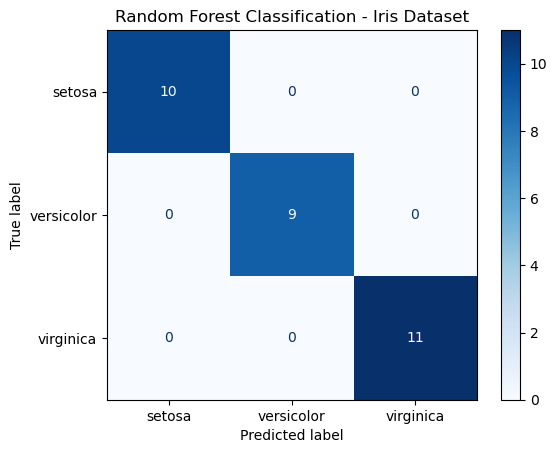

In [22]:
# Step 7. Visualization – Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Random Forest Classification - Iris Dataset")
plt.show()